# AirBnB data EDA: feature distributions

## Notebook set-up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data loading

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. Categorical features

### 2.1. Levels

In [ ]:
categorical_features=['neighbourhood_group','neighbourhood','room_type','host_name']

print('Unique levels by feature')
data_df[categorical_features].nunique()

Unique levels by feature


neighbourhood_group        5
neighbourhood            221
room_type                  3
host_name              11452
dtype: int64

### 2.2. Level counts

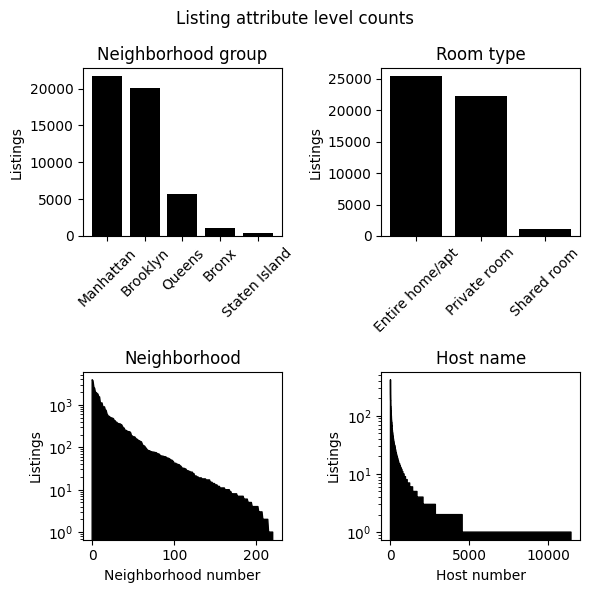

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(6,6))
axs=axs.flatten()

fig.suptitle('Listing attribute level counts')

# Plot neighborhood group level counts
level_counts=data_df['neighbourhood_group'].value_counts()

axs[0].set_title('Neighborhood group')
axs[0].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_ylabel('Listings')

# Plot room type level counts
level_counts=data_df['room_type'].value_counts()

axs[1].set_title('Room type')
axs[1].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color='black')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_ylabel('Listings')

# Plot neighborhood level counts
level_counts=data_df['neighbourhood'].value_counts()

axs[2].set_title('Neighborhood')
axs[2].fill_between(list(range(len(level_counts))), level_counts, color='black')
axs[2].set_xlabel('Neighborhood number')
axs[2].set_ylabel('Listings')
axs[2].set_yscale('log')

# Plot neighborhood level counts
level_counts=data_df['host_name'].value_counts()

axs[3].set_title('Host name')
axs[3].fill_between(list(range(len(level_counts))), level_counts, color='black')
axs[3].set_xlabel('Host number')
axs[3].set_ylabel('Listings')
axs[3].set_yscale('log')

plt.tight_layout()

In [ ]:
data_df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

## 3. Numerical features

### 3.1. Descriptive statistics

In [ ]:
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

data_df[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


### 3.2. Distribution plots

#### 3.2.1. Latitude & longitude

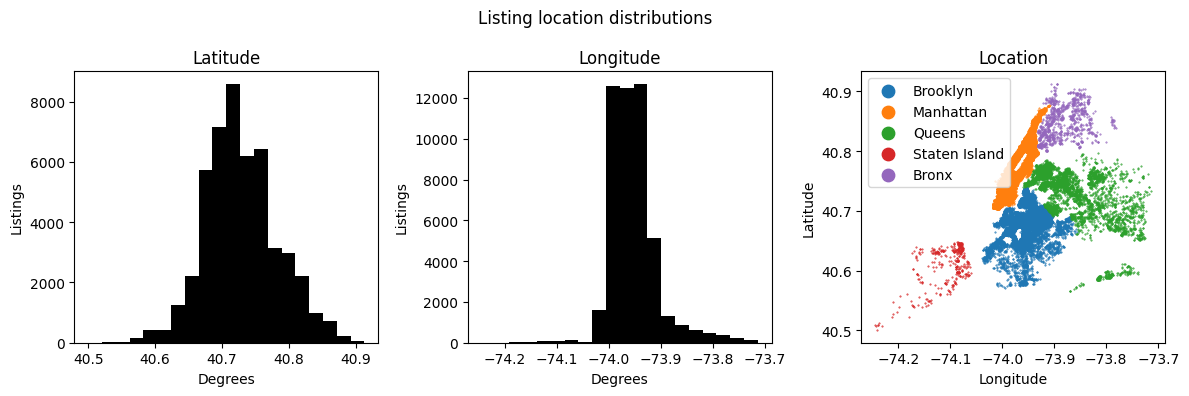

In [ ]:
fig, axs=plt.subplots(1,3, figsize=(12,4))
axs=axs.flatten()

fig.suptitle('Listing location distributions')

axs[0].set_title('Latitude')
axs[0].hist(data_df['latitude'], color='black', bins=20)
axs[0].set_xlabel('Degrees')
axs[0].set_ylabel('Listings')

axs[1].set_title('Longitude')
axs[1].hist(data_df['longitude'], color='black', bins=20)
axs[1].set_xlabel('Degrees')
axs[1].set_ylabel('Listings')

axs[2].set_title('Location')
for neighborhood_group in data_df['neighbourhood_group'].unique():
    axs[2].scatter(
        data_df['longitude'][data_df['neighbourhood_group'] == neighborhood_group],
        data_df['latitude'][data_df['neighbourhood_group'] == neighborhood_group],
        s=0.2,
        label=neighborhood_group
    )
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
axs[2].legend(loc='upper left', markerscale=20)

plt.tight_layout()
plt.show()

#### 3.2.2. Other listing attributes

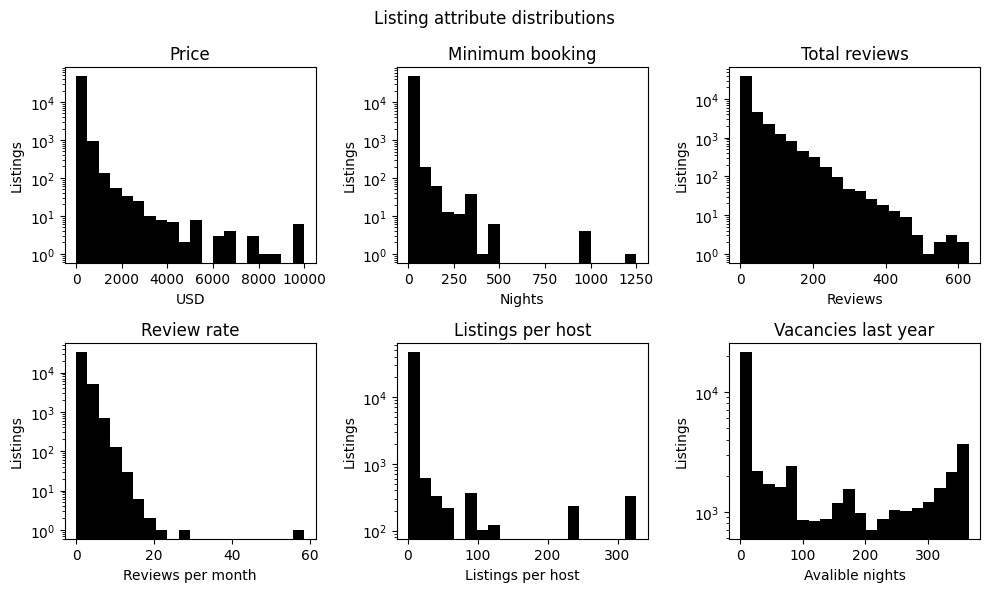

In [ ]:
features=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
plot_titles=['Price', 'Minimum booking', 'Total reviews', 'Review rate', 'Listings per host', 'Vacancies last year']
xlabels=['USD', 'Nights', 'Reviews', 'Reviews per month', 'Listings per host', 'Avalible nights']

fig, axs=plt.subplots(2,3, figsize=(10,6))
axs=axs.flatten()

fig.suptitle('Listing attribute distributions')

for i, (plot_title, feature, xlabel) in enumerate(zip(plot_titles, features, xlabels)):

    axs[i].set_title(plot_title)
    axs[i].hist(data_df[feature], bins=20, color='black')
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel('Listings')
    axs[i].set_yscale('log')

plt.tight_layout()


### 3.3. Inspect outliers

#### 3.3.1. Price > 5000

In [ ]:
data_df[data_df['price'] > 5000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
15560,12520066,Luxury townhouse Greenwich Village,66240032,Linda,Manhattan,Greenwich Village,40.73046,-73.99562,Entire home/apt,6000,1,0,NaN,NaN,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


#### 3.3.2. Minimum nights > 500

In [ ]:
data_df[data_df['minimum_nights'] > 500]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365


#### 3.3.3. Listings per host > 150

In [ ]:
data_df[data_df['calculated_host_listings_count'] > 150].T

,26137,29128,30158,30428,31506,31575,31973,32788,34048,35411,...,48563,48564,48565,48566,48722,48723,48724,48725,48726,48727
id,20845031,22370388,23264421,23538486,24535218,24594717,24960138,25823670,26982403,28095496,...,36315721,36315759,36315794,36315828,36404568,36404684,36404784,36404815,36404936,36404972
name,"Homey Midtown East 1BR w/ Gym, Doorman, near t...","Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...","Mod Midtown East 1BR w/ Gym, walk to Grand Cen...","Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...","Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...","Large, Bright Midtown East 1 BR in Luxury buil...","Bright, Winged Tribeca Studio w/ Indoor pool, ...","Adorable UES Studio w/ Balcony, Gym + Doorman ...",Enchanting 1BR near Times Sq w/ Indoor pool + ...,"Roomy FiDi 1BR w/ Gym, Roof deck + Doorman by ...",...,"Stunning Chelsea 1BR w/ Gym, W/D, Doorman, Sun...","Quaint Tribeca Studio w/ Gym, W/D, Doorman, Ga...",Elegant Chelsea 2BR w/ Elevator,Lux Tribeca Studio w/ Pool + Gym + View near C...,Sharp Upper East Side 2BR w/ Gym + W/D near th...,Smart Nolita 1BR w/ W/D near famous cafes by B...,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,Beautiful Williamsburg 2BR w/ Skyline views + ...,"Hip East Village 1BR w/ Gym, W/D, Doorman, nea..."
host_id,107434423,107434423,107434423,107434423,107434423,107434423,107434423,107434423,107434423,107434423,...,107434423,107434423,107434423,107434423,107434423,107434423,107434423,107434423,107434423,107434423
host_name,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,...,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground,Blueground
neighbourhood_group,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kips Bay,Financial District,Murray Hill,Murray Hill,Tribeca,Kips Bay,Tribeca,Upper East Side,Theater District,Financial District,...,Midtown,Tribeca,Chelsea,Tribeca,Upper East Side,Nolita,Hell's Kitchen,Hell's Kitchen,Williamsburg,East Village
latitude,40.7451,40.70637,40.749,40.74891,40.71433,40.74112,40.71686,40.77669,40.76196,40.70427,...,40.74444,40.713,40.74451,40.71495,40.77739,40.72283,40.76082,40.76083,40.71493,40.73206
longitude,-73.97915,-74.00941,-73.97961,-73.97887,-74.01073,-73.98009,-74.00484,-73.95673,-73.98536,-74.00964,...,-73.99015,-74.00991,-73.99939,-74.00701,-73.94916,-73.99472,-73.99709,-73.99727,-73.96365,-73.98776
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,308,271,289,305,323,271,305,211,280,285,...,343,269,421,314,393,316,385,267,278,365


In [ ]:
data_df['host_name'][data_df['calculated_host_listings_count'] > 150].value_counts()

host_name
Sonder (NYC)    327
Blueground      232
Name: count, dtype: int64

These two 'hosts' with extremely high listing counts are really hotels/large property management companies:
- [Sonder/Sonder (NYC)](https://en.wikipedia.org/wiki/Sonder_(company))
- [Blueground](https://www.theblueground.com/)

#### 3.3.4. Reviews per month > 30

In [ ]:
data_df[data_df['reviews_per_month'] > 30]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [ ]:
data_df['host_name'][data_df['reviews_per_month'] > 30].value_counts()

host_name
Row NYC    1
Name: count, dtype: int64

Same here: [Row NYC](https://www.rownyc.com/)

In [ ]:
data_df[data_df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


## 4. Other strange things

### 4.1. Price = 0 listings

In [ ]:
data_df[data_df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


### 4.1. Duplicated listing names

In [ ]:
listing_description_counts=data_df['name'].value_counts()
listing_description_counts[listing_description_counts > 1].to_frame().head(20)

,count
name,
Hillside Hotel,18
Home away from home,17
New york Multi-unit building,16
Brooklyn Apartment,12
Loft Suite @ The Box House Hotel,11
Private Room,11
Private room,10
Artsy Private BR in Fort Greene Cumberland,10
Private room in Brooklyn,8


In [ ]:
data_df[data_df['name'] == 'Hillside Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaN,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaN,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaN,NaN,18,355


In [ ]:
listing_description_counts[listing_description_counts == 2].to_frame().head()

,count
name,
Brownstone Garden Apartment,2
Spacious Room in Williamsburg,2
COZY ROOM,2
Rockaway Beach House,2
Sunny Brooklyn Brownstone apartment,2


In [ ]:
data_df[data_df['host_name'] == 'The Box House Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79
327,80684,Duplex w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73776,-73.95327,Private room,349,3,8,2016-03-27,0.09,28,60
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
365,103311,2 BR w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73861,-73.95485,Private room,599,3,9,2018-05-19,0.09,28,60
652,248865,Loft Suite @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73787,-73.95385,Entire home/apt,199,3,34,2019-04-22,0.37,28,60
668,253466,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73693,-73.95284,Entire home/apt,199,3,33,2019-06-24,0.47,28,60
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60


In [ ]:
data_df[data_df['name'] == 'Spacious Room in Williamsburg']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13166,9938746,Spacious Room in Williamsburg,1968682,Jay,Brooklyn,Williamsburg,40.70926,-73.95037,Private room,50,2,0,NaN,NaN,1,0
14986,11929230,Spacious Room in Williamsburg,31919152,Ryan,Brooklyn,Williamsburg,40.70878,-73.94441,Private room,60,7,0,NaN,NaN,1,0


In [ ]:
data_df[data_df['name'] == 'COZY ROOM']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20584,16363328,COZY ROOM,18329648,Genya,Brooklyn,Sheepshead Bay,40.60664,-73.95402,Private room,40,1,0,NaN,NaN,1,0
41160,32017624,COZY ROOM,204926318,Bibi,Brooklyn,East Flatbush,40.65351,-73.94999,Private room,40,30,0,NaN,NaN,1,300
